In [31]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = ['BorrowerName','NAICSCode', 'CurrentApprovalAmount', 'JobsReported', 'BorrowerCity']
df = pd.read_csv('public_150k_plus_230930.csv', usecols=x)
df = df.dropna()

In [12]:
df = df[(df['BorrowerCity'] == 'New York')].reset_index(drop=True)
df.head()

,BorrowerName,BorrowerCity,CurrentApprovalAmount,JobsReported,NAICSCode
0,"CHOP'T HOLDINGS, LLC",New York,10000000.0,500.0,722513.0
1,SENTRY CENTERS HOLDINGS LLC,New York,10000000.0,500.0,519120.0
2,YOUNG MEN'S CHRISTIAN ASSOCIATION OF GREATER N...,New York,10000000.0,500.0,813410.0
3,PLANNED PARENTHOOD OF GREATER NEW YORK INC.,New York,10000000.0,500.0,524114.0
4,NEW YORK HOTEL TRADES COUNCIL AND HOTEL ASSOCI...,New York,10000000.0,287.0,525120.0


In [13]:
#Convert Naics to string if I want to broaden industry to use  2 digit codes instead of 6 digit.
df['NAICSCode'] = df['NAICSCode'].astype(str).str.strip('.0')

#SBA allowed loan apps for 2.5x the average monthly payroll cost.
df['Avg_Monthly_Payroll'] = df['CurrentApprovalAmount'] / 2.5

#count firms in each NAICS and merge using NAICS as key
total_firm_per_naics = df.groupby('NAICSCode').size().reset_index(name='TotalFirm')
df = pd.merge(df, total_firm_per_naics, on='NAICSCode')


In [16]:
#Calculate the total payroll in each industry
total_payroll_per_naics = df.groupby('NAICSCode')['Avg_Monthly_Payroll'].sum().reset_index()
total_payroll_per_naics.columns = ['NAICSCode', 'TotalPayroll']

In [17]:
total_payroll_per_naics

,NAICSCode,TotalPayroll
0,11111,366120.800
1,11113,128392.800
2,111219,208886.800
3,111331,931720.000
4,111419,63720.000
...,...,...
540,92312,2439791.200
541,92512,666204.400
542,92611,380080.000
543,92812,101200.000


In [18]:
# Merge total payroll with og df 
df = pd.merge(df, total_payroll_per_naics, on='NAICSCode')

In [22]:
#Market share for each business within each NAICS code = biz payroll/marketpayroll * 100 
df['MarketShare'] = (df['Avg_Monthly_Payroll'] / df['TotalPayroll']) * 100

#Calculate HHI for each NAICS code by summing the squares of each biz market share.
df['MarketShareSquared'] = (df['MarketShare']) ** 2
hhi_per_naics = df.groupby('NAICSCode')['MarketShareSquared'].sum().reset_index()
hhi_per_naics.columns = ['NAICSCode', 'HHI']

hhi_per_naics.head()

,NAICSCode,HHI
0,11111,5313.244733
1,11113,10000.000000
2,111219,5392.226513
3,111331,10000.000000
4,111419,10000.000000


In [23]:
df = pd.merge(df, hhi_per_naics, on='NAICSCode')
df.head()

,BorrowerName,BorrowerCity,CurrentApprovalAmount,JobsReported,NAICSCode,Avg_Monthly_Payroll,TotalFirm,TotalPayroll,MarketShare,MarketShareSquared,HHI
0,"CHOP'T HOLDINGS, LLC",New York,10000000.0,500.0,722513,4000000.0,243,4.344352e+07,9.207358,84.775440,162.261602
1,SENTRY CENTERS HOLDINGS LLC,New York,10000000.0,500.0,51912,4000000.0,6,4.978840e+06,80.340002,6454.515938,6550.264250
2,YOUNG MEN'S CHRISTIAN ASSOCIATION OF GREATER N...,New York,10000000.0,500.0,81341,4000000.0,78,2.257122e+07,17.721683,314.058054,601.940842
3,PLANNED PARENTHOOD OF GREATER NEW YORK INC.,New York,10000000.0,500.0,524114,4000000.0,2,4.150391e+06,96.376457,9288.421509,9301.551572
4,NEW YORK HOTEL TRADES COUNCIL AND HOTEL ASSOCI...,New York,10000000.0,287.0,52512,4000000.0,3,4.489432e+06,89.098131,7938.476930,8002.759622


In [24]:
# Get NAICS code descriptions from the Excel file and conver to string to match dtype in df
naics_descriptions = pd.read_excel('2-6 digit_2017_Codes.xlsx', usecols=['2017 NAICS US   Code', '2017 NAICS US Title'])
naics_descriptions.columns = ['NAICSCode', 'NAICSTitle']
naics_descriptions = naics_descriptions.dropna()

naics_descriptions['NAICSCode'] = naics_descriptions['NAICSCode'].astype(str)

In [25]:
#merge descriptions into main df
df = pd.merge(df, naics_descriptions, on='NAICSCode')

In [26]:
df.head()

,BorrowerName,BorrowerCity,CurrentApprovalAmount,JobsReported,NAICSCode,Avg_Monthly_Payroll,TotalFirm,TotalPayroll,MarketShare,MarketShareSquared,HHI,NAICSTitle
0,"CHOP'T HOLDINGS, LLC",New York,10000000.0,500.0,722513,4000000.0,243,4.344352e+07,9.207358,84.775440,162.261602,Limited-Service Restaurants
1,SENTRY CENTERS HOLDINGS LLC,New York,10000000.0,500.0,51912,4000000.0,6,4.978840e+06,80.340002,6454.515938,6550.264250,Libraries and Archives
2,YOUNG MEN'S CHRISTIAN ASSOCIATION OF GREATER N...,New York,10000000.0,500.0,81341,4000000.0,78,2.257122e+07,17.721683,314.058054,601.940842,Civic and Social Organizations
3,PLANNED PARENTHOOD OF GREATER NEW YORK INC.,New York,10000000.0,500.0,524114,4000000.0,2,4.150391e+06,96.376457,9288.421509,9301.551572,Direct Health and Medical Insurance Carriers
4,NEW YORK HOTEL TRADES COUNCIL AND HOTEL ASSOCI...,New York,10000000.0,287.0,52512,4000000.0,3,4.489432e+06,89.098131,7938.476930,8002.759622,Health and Welfare Funds


In [27]:
full_df = df
full_df.head()

,BorrowerName,BorrowerCity,CurrentApprovalAmount,JobsReported,NAICSCode,Avg_Monthly_Payroll,TotalFirm,TotalPayroll,MarketShare,MarketShareSquared,HHI,NAICSTitle
0,"CHOP'T HOLDINGS, LLC",New York,10000000.0,500.0,722513,4000000.0,243,4.344352e+07,9.207358,84.775440,162.261602,Limited-Service Restaurants
1,SENTRY CENTERS HOLDINGS LLC,New York,10000000.0,500.0,51912,4000000.0,6,4.978840e+06,80.340002,6454.515938,6550.264250,Libraries and Archives
2,YOUNG MEN'S CHRISTIAN ASSOCIATION OF GREATER N...,New York,10000000.0,500.0,81341,4000000.0,78,2.257122e+07,17.721683,314.058054,601.940842,Civic and Social Organizations
3,PLANNED PARENTHOOD OF GREATER NEW YORK INC.,New York,10000000.0,500.0,524114,4000000.0,2,4.150391e+06,96.376457,9288.421509,9301.551572,Direct Health and Medical Insurance Carriers
4,NEW YORK HOTEL TRADES COUNCIL AND HOTEL ASSOCI...,New York,10000000.0,287.0,52512,4000000.0,3,4.489432e+06,89.098131,7938.476930,8002.759622,Health and Welfare Funds


In [54]:
competitive = full_df[(full_df['HHI'] < 1500) & (full_df['TotalFirm']>10)]
moderate_concentration = full_df[(full_df['HHI'] >= 1500) & (full_df['HHI'] < 2500) & (full_df['TotalFirm']>10)]
highly_concentrated = full_df[(full_df['HHI'] >= 2500) & (full_df['TotalFirm']>10) & (full_df['TotalFirm']>10)]

The Herfindahl-Hirschman Index (HHI) is a measure of market concentration used to evaluate the level of competition within an industry. A market is considered competitive if its HHI is below 1500, indicating a large number of firms with relatively equal market shares, resulting in a highly competitive environment with minimal market power held by any single firm. Moderate concentration is characterized by an HHI between 1500 and 2500, suggesting a market with a few dominant firms holding significant market shares but still allowing for competitive dynamics. A highly concentrated market, with an HHI above 2500, indicates a high level of market concentration where a few firms dominate, leading to reduced competition and increased potential for monopolistic behavior.

In [62]:
# Function to plot top 5 and bottom 5 unique NAICS codes by HHI
def plot_top_and_bottom_5_naics_by_hhi(df, title):
    # Drop duplicates to ensure unique NAICSCodes
    unique_naics = df[['NAICSCode', 'NAICSTitle', 'HHI', 'TotalFirm', 'TotalPayroll']].drop_duplicates(subset=['NAICSCode'])

    # Get top 5 unique NAICS codes by HHI
    top_5_naics = unique_naics.nlargest(5, 'HHI')

    # Get bottom 5 unique NAICS codes by HHI
    bottom_5_naics = unique_naics.nsmallest(5, 'HHI')

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

    # Plot top 5 NAICS codes
    axes[0].barh(top_5_naics['NAICSTitle'], top_5_naics['HHI'], color='skyblue')
    axes[0].set_xlabel('HHI')
    axes[0].set_ylabel('NAICS Title')
    axes[0].set_title(f'Top 5 NAICS Codes by HHI in {title}')
    axes[0].invert_yaxis()

    # Add text on top of bars for top 5
    for bar, total_firm, total_payroll in zip(axes[0].patches, top_5_naics['TotalFirm'], top_5_naics['TotalPayroll']):
        bar_width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2
        axes[0].text(bar_width, y_pos, f'Firms: {total_firm}\nPayroll: ${total_payroll:,.0f}/month', 
                     va='center', ha='left', color='black', fontsize=10)

    # Plot bottom 5 NAICS codes
    axes[1].barh(bottom_5_naics['NAICSTitle'], bottom_5_naics['HHI'], color='skyblue')
    axes[1].set_xlabel('HHI')
    axes[1].set_ylabel('NAICS Title')
    axes[1].set_title(f'Bottom 5 NAICS Codes by HHI in {title}')
    axes[1].invert_yaxis()

    # Add text on top of bars for bottom 5
    for bar, total_firm, total_payroll in zip(axes[1].patches, bottom_5_naics['TotalFirm'], bottom_5_naics['TotalPayroll']):
        bar_width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2
        axes[1].text(bar_width, y_pos, f'Firms: {total_firm}\nPayroll: ${total_payroll:,.0f}/month', 
                     va='center', ha='left', color='black', fontsize=10)

    plt.show()

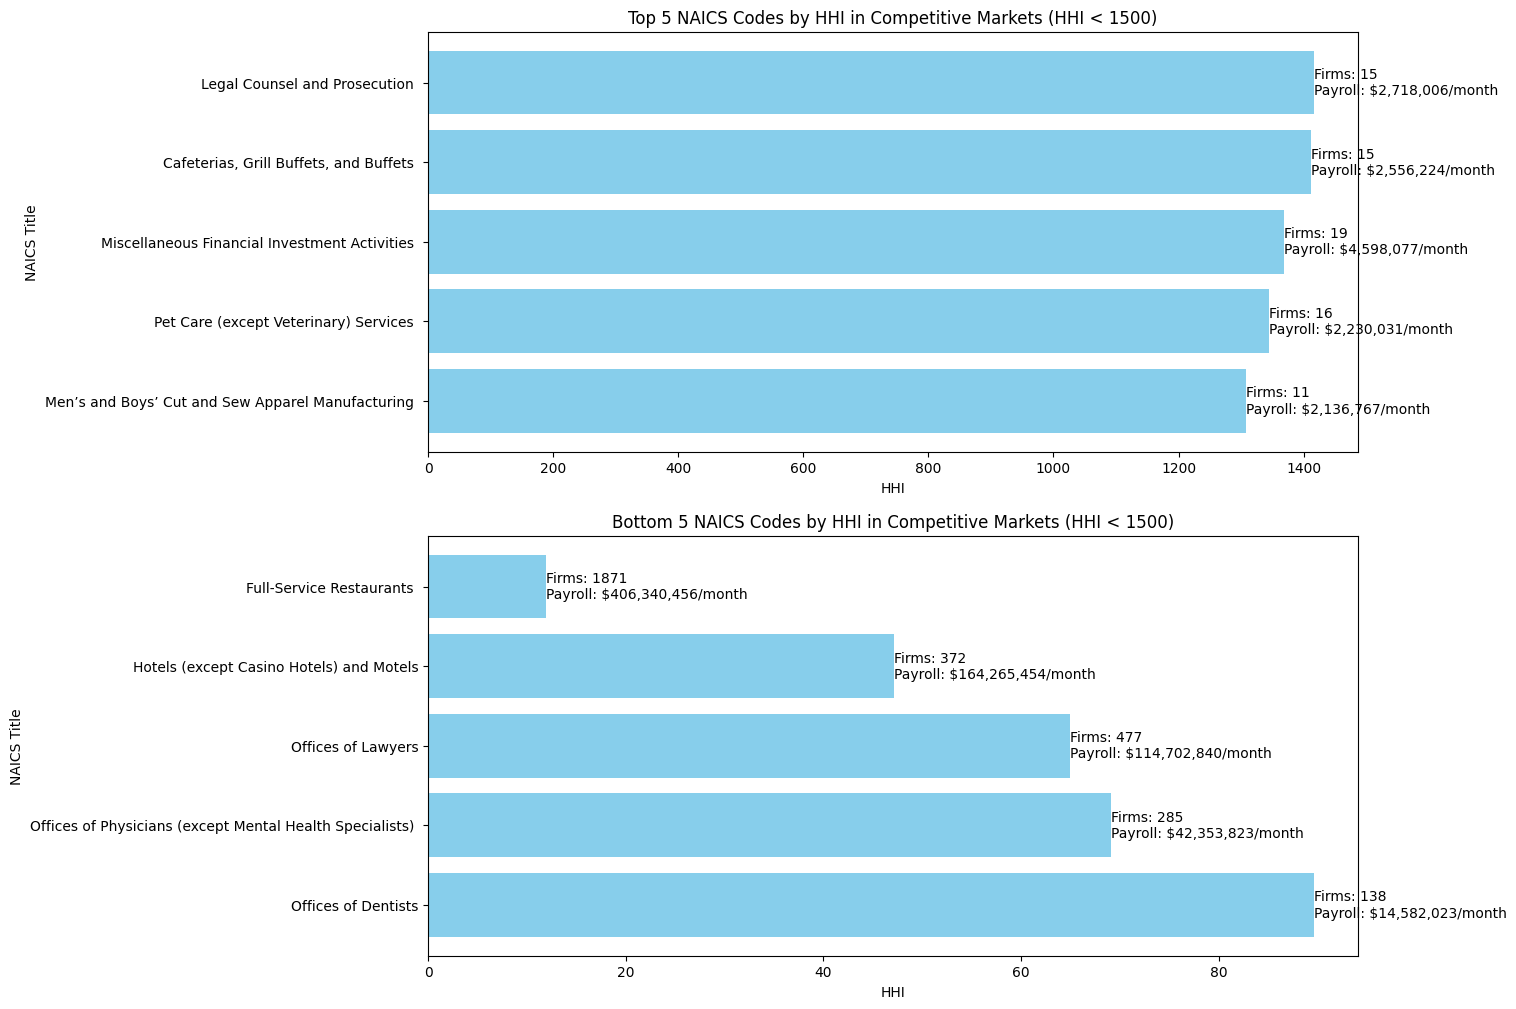

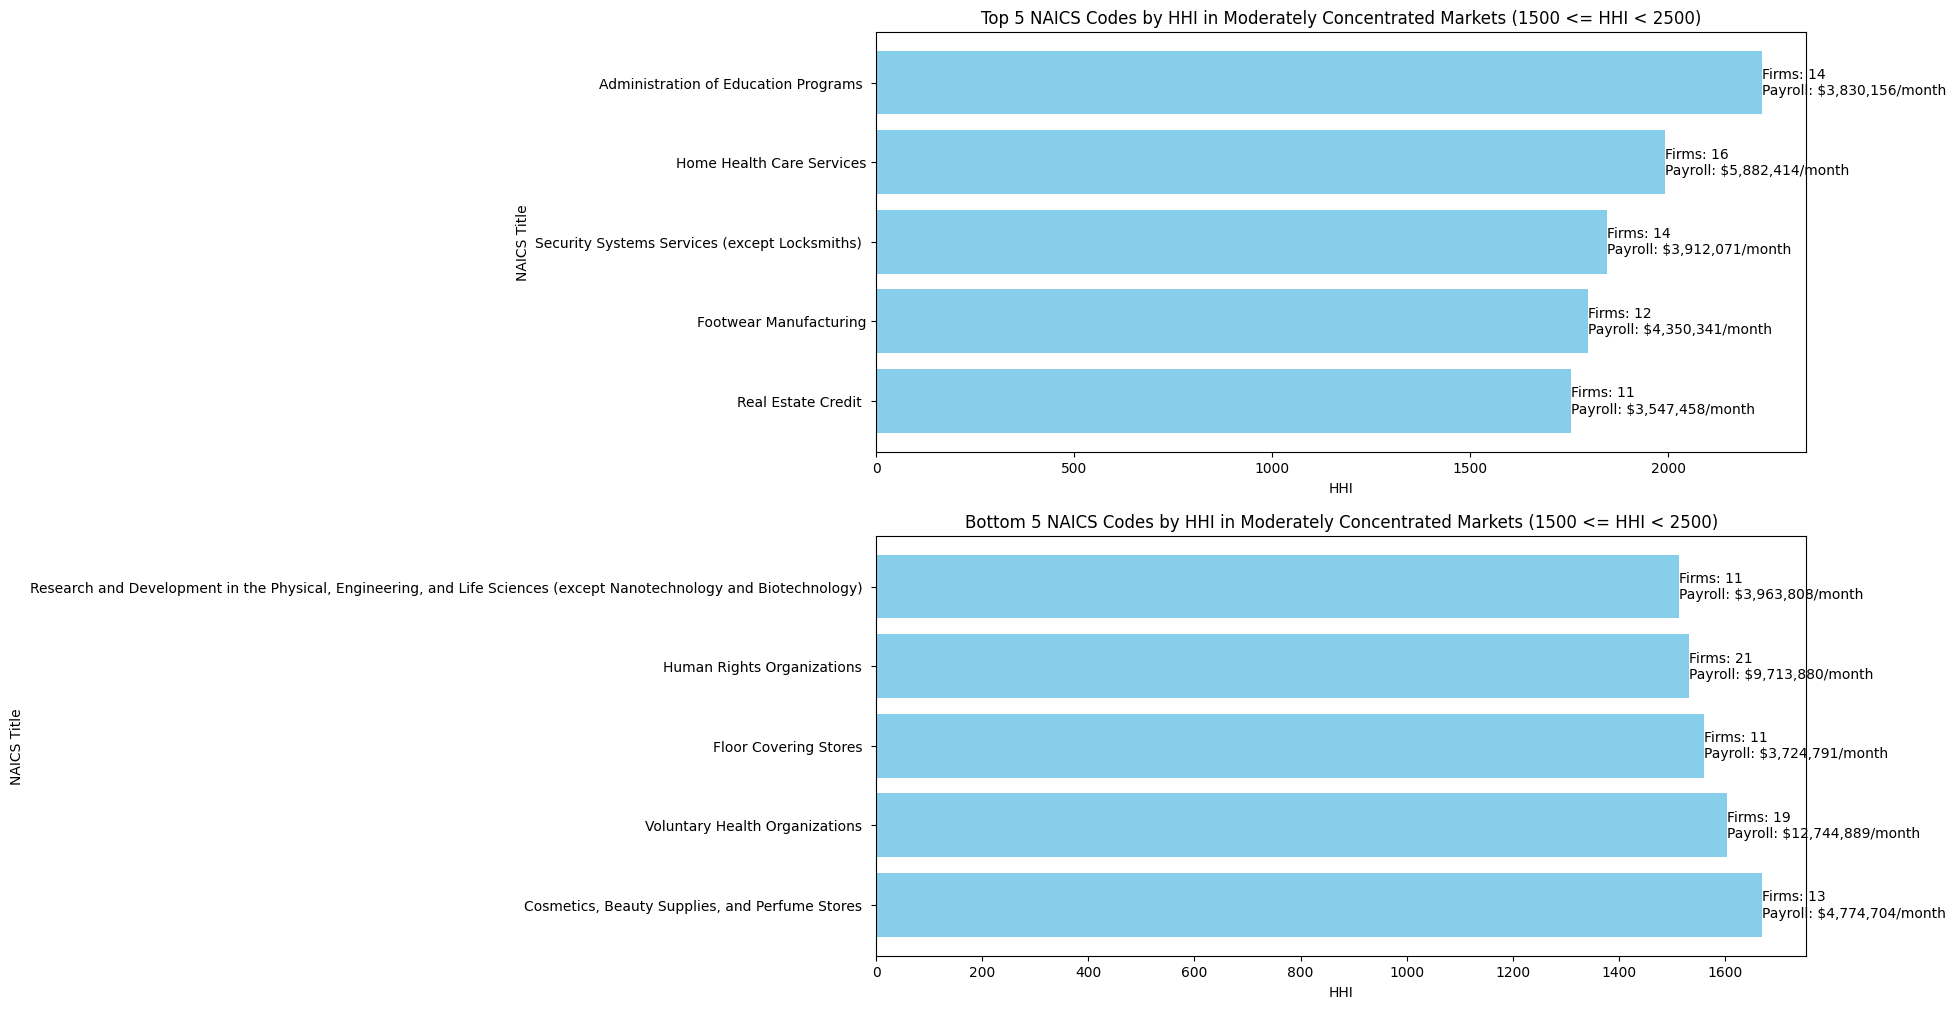

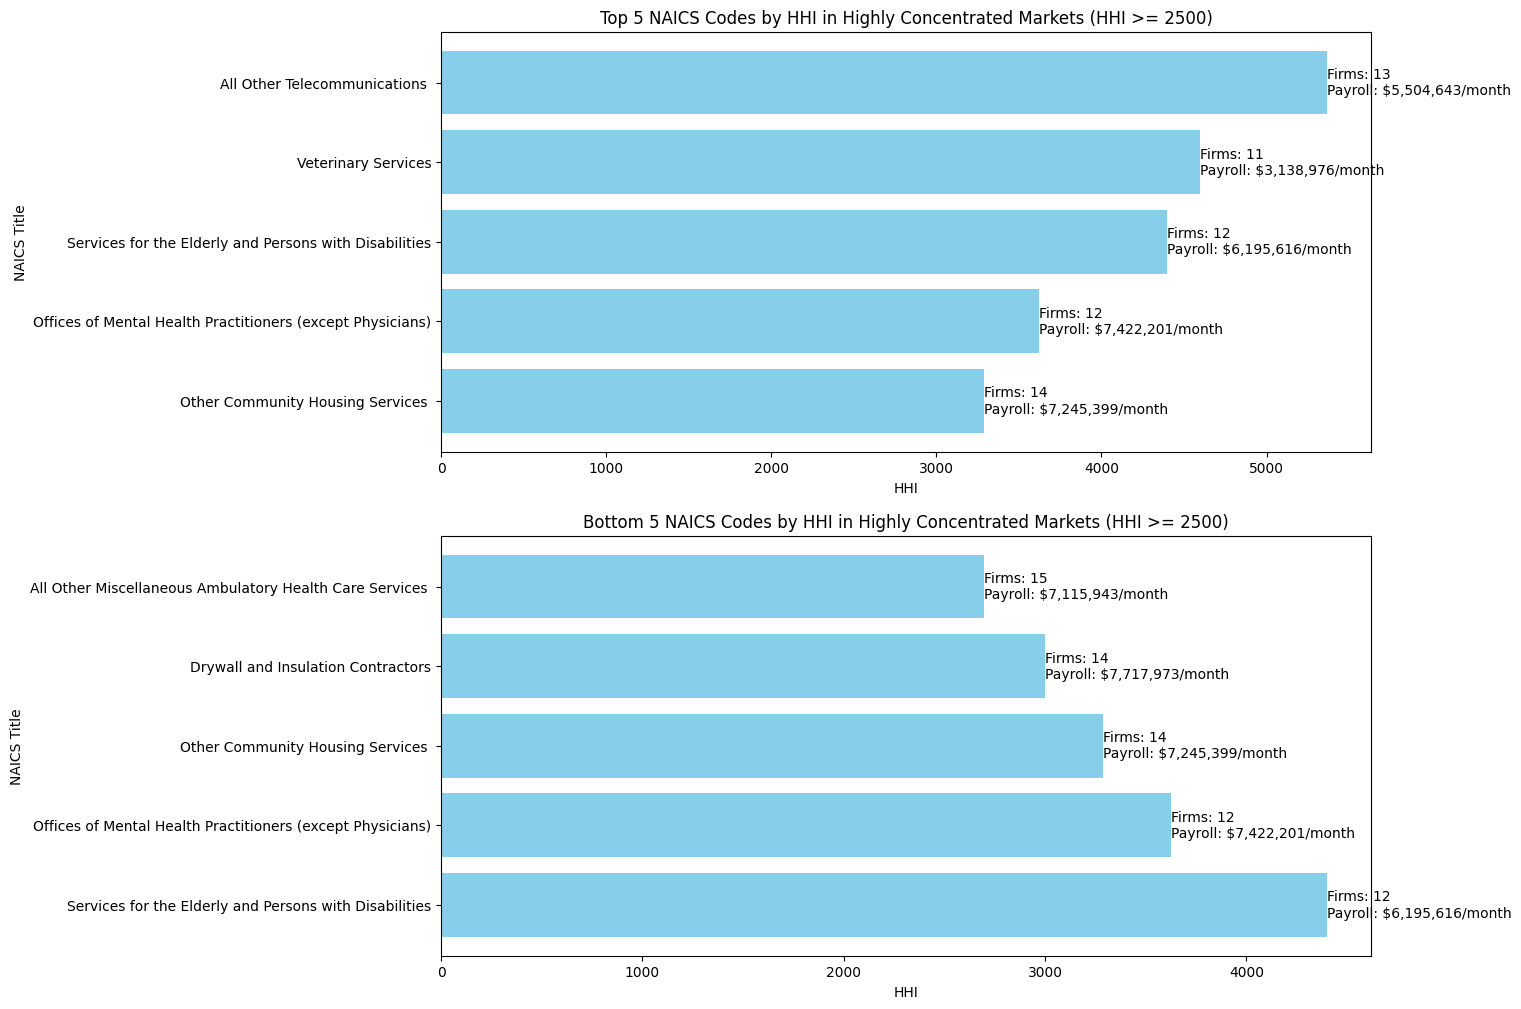

In [63]:
plot_top_and_bottom_5_naics_by_hhi(competitive, 'Competitive Markets (HHI < 1500)')
plot_top_and_bottom_5_naics_by_hhi(moderate_concentration, 'Moderately Concentrated Markets (1500 <= HHI < 2500)')
plot_top_and_bottom_5_naics_by_hhi(highly_concentrated, 'Highly Concentrated Markets (HHI >= 2500)')